# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

 ==> Restrict GPU memory growth: True


# Start Network runner

In [5]:
DATASET = Dataset.FVC_ICAO
#APPROACH = NAS_MTLApproach.APPROACH_2
APPROACH = STLApproach.STL

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS with Approach 2 Fixed',
        'tags': [f'{DATASET.value["name"]}', 'refac_properties', 'stl'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': [DATASET.value['tasks'][3]],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        #'max_blocks_per_branch': 5,
        #'n_child_epochs': N_CHILD_EPOCHS,
        #'controller_epochs': CONTROLLER_EPOCHS,
        #'controller_batch_size': 64,
        #'n_trials': N_TRIALS,

        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': True
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': True
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 108884
Process ID: 111225
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_use_predictor': True},
 'exp_params': {'description': 'NAS with Approach 2 Fixed',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['fvc_icao', 'refac_properties', 'stl']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <fun

# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 4)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 4)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 4)
Data loaded


In [7]:
runner.train_data.head()

,origin,img_name,eyes_closed,aligned
0,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,False
1,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,False
2,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,False
3,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,False
4,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,False


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5763

Logging class indices
 ..Train Generator: {'0': 0, '1': 1}
 ..Valid Generator: {'0': 0, '1': 1}
 ..Test Generator: {'0': 0, '1': 1}

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [10]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [11]:
best_archs_list = runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------
Not executing neural architecture search


# Create Model with Best Architecture Found

In [12]:
#best_arch = {'n_denses_0':2,'n_denses_1':2,'n_denses_2':2,'n_denses_3':2}
best_arch = best_archs_list[0]['Decoded architecture'] if best_archs_list is not None else None

In [13]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [14]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_{APPROACH.name}.png")

In [15]:
%%capture
runner.model_summary()

# Training Model

In [16]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 10,286,530
  .. Trainable params: 8,028,546
  .. Non-trainable params: 2,257,984
Epoch 1/50
77/77 [==============================] - 410s 5s/step - loss: 0.2874 - accuracy: 0.8750 - val_loss: 1.1918 - val_accuracy: 0.8496

Epoch 00001: val_loss improved from inf to 1.19182, saving model to training_ckpt/best_model.hdf5


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
77/77 [==============================] - 392s 5s/step - loss: 0.1957 - accuracy: 0.9600 - val_loss: 0.8474 - val_accuracy: 0.8789

Epoch 00002: val_loss improved from 1.19182 to 0.84735, saving model to training_ckpt/best_model.hdf5
Epoch 3/50
77/77 [==============================] - 375s 5s/step - loss: 0.1764 - accuracy: 0.9704 - val_loss: 0.8273 - val_accuracy: 0.8867

Epoch 00003: val_loss improved from 0.84735 to 0.82729, saving model to training_ckpt/best_model.hdf5
Epoch 4/50
77/77 [==============================] - 382s 5s/step - loss: 0.1672 - accuracy: 0.9775 - val_loss: 0.4924 - val_accuracy: 0.9238

Epoch 00004: val_loss improved from 0.82729 to 0.49239, saving model to training_ckpt/best_model.hdf5
Epoch 5/50
77/77 [==============================] - 403s 5s/step - loss: 0.1576 - accuracy: 0.9783 - val_loss: 0.4453 - val_accuracy: 0.9688

Epoch 00005: val_loss improved from 0.49239 to 0.44527, saving model to training_ckpt/best_model.hdf5
Epoch 6/50
77/77 [======

# Plots

-------------------- draw training history -------------------


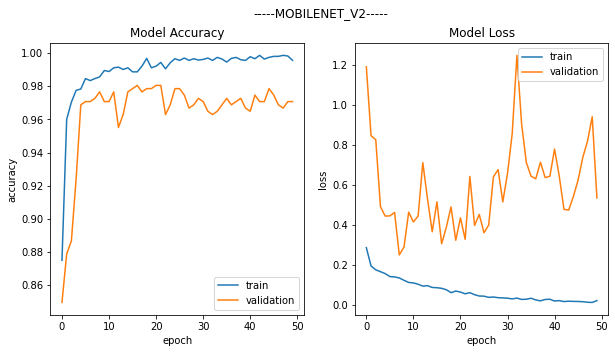

In [17]:
runner.draw_training_history()

# Load Best Model

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
Checkpoint not found


# Saving Trained Model

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
9/9 [==============================] - 31s 3s/step
Prediction finished!
  Task  0: eyes_closed     | EER_mean: 0.05610 | EER_interp: 0.00000 | ACC: 0.19380
final_EER_mean: 0.0% | final_EER_median: 0.0% | final_EER_std_dv: 0.0% | final_ACC: 19.38%


## Test Split

In [22]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
5/5 [==============================] - 22s 5s/step
Prediction finished!
  Task  0: eyes_closed     | EER_mean: 0.08530 | EER_interp: 0.00000 | ACC: 0.19100
final_EER_mean: 0.0% | final_EER_median: 0.0% | final_EER_std_dv: 0.0% | final_ACC: 19.1%


# Visualize Model Classification

# Finishing Experiment Manager

In [23]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-428
